Index([u'bp', u'sg', u'al', u'su', u'rbc', u'pc', u'pcc', u'ba', u'bgr', u'bu',
       u'sc', u'sod', u'pot', u'hemo', u'pcv', u'wbcc', u'rbcc', u'htn', u'dm',
       u'cad', u'appet', u'pe', u'ane', u'class'],
      dtype='object')
      bp     sg   al   su     rbc        pc         pcc          ba  bgr   bu  \
age                                                                             
NaN  NaN    NaN  NaN  NaN     NaN       NaN         NaN         NaN  NaN  NaN   
48    80  1.020    1    0       ?    normal  notpresent  notpresent  121   36   
7     50  1.020    4    0       ?    normal  notpresent  notpresent    ?   18   
62    80  1.010    2    3  normal    normal  notpresent  notpresent  423   53   
48    70  1.005    4    0  normal  abnormal     present  notpresent  117   56   

     ...   pcv  wbcc rbcc  htn   dm  cad appet   pe  ane class  
age  ...                                                        
NaN  ...   NaN   NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN   NaN  
48  

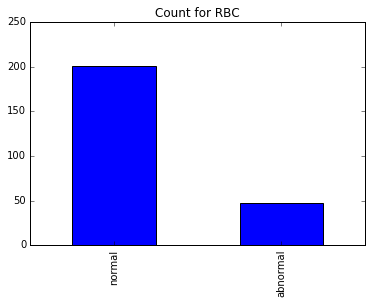

In [110]:
import pandas as pd
import numpy as np


#Load the dataset to pandas dataframe and print names of columns
ckd = pd.DataFrame.from_csv("/resources/data/chronic_kidney_disease_updated.csv")                           
print ckd.columns

#Display first 5 rows in the dataset.
print ckd[:5]


#Check if dataset is in cleaned form else clean it. 
#Check Diabetes Mellitus(dm) variable and print what type of values it has.
print ckd.dm.unique()

"""The dataset is not in clean form. 
Write a function that takes pandas dataframe as an input and replace these characters 
i-e ( "\t", " ", "?") with "nan" the function should apply this transformation to all columns in 
dataframe and for cross check display unique values of Diabetes Mellitus(dm)"""

ckd.replace( ["\?|\s", "\\\t[yes|no|0-9]*"], [np.nan, "\[yes|no|0-9]" ], inplace=True, regex=True)
print ckd.dm.unique()

#Change datatype to Numerical of following columns in Dataframe. 
#columns = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

lst = ['bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
for i in lst:
    ckd[i] = pd.to_numeric(ckd[i])
    print ckd[i].dtypes
    
#Count the number of normal or abnormal red blood cells people having Chronic Kidney Disease(CKD).
lst = pd.value_counts(ckd['rbc'].values, sort = False)
print lst
lst.plot(kind = "bar", title= "Count for RBC")


#Display maximum blood pressure having Chronic Kidney Disease(CKD)
#print np.nanmax(ckd.bp.values)
print max(ckd.loc[ckd['class'] == 'ckd', 'bp'])

#Create a csv file of cleaned data in dataframe with name "clean_chronic_kidney_disease.csv"
ckd.to_csv("/resources/data/clean_chronic_kidney_disease.csv")
